In [1]:
#libraries & dependencies
import pandas as pd
import numpy as np
#data normalizing
from sklearn.preprocessing import LabelEncoder
#imputation of missing values
from sklearn.impute import SimpleImputer
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

In [2]:
start = time.time()
trainTransaction = pd.read_csv('/Users/mike/ieee-fraud-detection/train_transaction.csv')
trainIdentity = pd.read_csv('/Users/mike/ieee-fraud-detection/train_identity.csv')
testTransaction = pd.read_csv('/Users/mike/ieee-fraud-detection/test_transaction.csv')
testIdentity = pd.read_csv('/Users/mike/ieee-fraud-detection/test_identity.csv')
print('Data was loaded. Time: ', time.time()-start)

Data was loaded. Time:  47.19129204750061


In [3]:
#Data preparation: checking the percentage of fraudulent transactions
print(testTransaction.shape)
trainTransaction.info()
print('Percentage of fraudulent transactions:', len(trainTransaction.loc[trainTransaction.isFraud == 1]) * 100/len(trainTransaction))

(506691, 393)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
Percentage of fraudulent transactions: 3.499000914417313


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

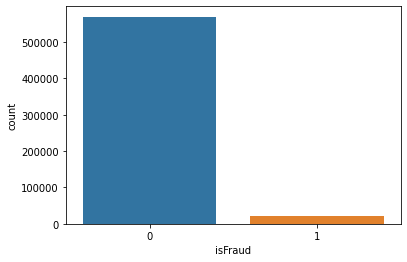

In [4]:
sns.countplot(trainTransaction.isFraud)

In [5]:
#now it is crucial to remove 'isFraud' field, cause in several steps next the dataset would be divided into test/training sets
y_train = trainTransaction['isFraud']
print(trainTransaction.shape)
trainTransaction = trainTransaction.drop(columns = ['isFraud'])
print(trainTransaction.shape)

(590540, 394)
(590540, 393)


In [6]:
#smth should be done with NaN fields
print(trainTransaction.head())
print(trainIdentity.head())
print(trainIdentity.shape)
print(trainIdentity.columns)

   TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        2987000          86400            68.5         W  13926    NaN   
1        2987001          86401            29.0         W   2755  404.0   
2        2987002          86469            59.0         W   4663  490.0   
3        2987003          86499            50.0         W  18132  567.0   
4        2987004          86506            50.0         H   4497  514.0   

   card3       card4  card5   card6  ...  V330  V331  V332  V333 V334 V335  \
0  150.0    discover  142.0  credit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
1  150.0  mastercard  102.0  credit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
2  150.0        visa  166.0   debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
3  150.0  mastercard  117.0   debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
4  150.0  mastercard  102.0  credit  ...   0.0   0.0   0.0   0.0  0.0  0.0   

   V336  V337  V338  V339  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   Na

In [7]:
#understanding some info about identity dataset
#in somewhere next much more precious evaluation on id content
#merging train/test data to normalize
#print(trainTransaction.index)
#print(trainIdentity.index)
#print(trainIdentity.id_01.value_counts())
#print(trainIdentity.id_07.value_counts())
#print(trainIdentity.id_33.value_counts())
#print(trainIdentity.DeviceType.value_counts())
#print(trainIdentity.DeviceInfo.value_counts())
testIdentity.columns = ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
       'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo']
print(testIdentity.columns)
trainTransaction = pd.concat([trainTransaction, testTransaction])
trainIdentity = pd.concat([trainIdentity, testIdentity], axis = 0)
print(trainTransaction.shape)
print(trainIdentity.shape)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')
(1097231, 393)
(286140, 41)


In [8]:
#generating separate lists for numerical and categorical data
print('Identity dataset:\n')
helpCat = (trainIdentity.dtypes == 'object')
categoricalColumnsId = list(helpCat[helpCat].index)
print('Quantity of categorical columns: ', len(categoricalColumnsId))
#print(categoricalColumnsId)
helpNum = (trainIdentity.dtypes != 'object')
numericalColumnsId = list(helpNum[helpNum].index)
print('Quantity of numerical columns: ', len(numericalColumnsId))
print(numericalColumnsId)
print(categoricalColumnsId)
#print(numericalColumnsId)
print('\nTransaction dataset:\n')
helpCat = (trainTransaction.dtypes == 'object')
categoricalColumnsTS = list(helpCat[helpCat].index)
print('Quantity of categorical columns: ', len(categoricalColumnsTS))
#print(categoricalColumnsTS)
helpNum = (trainTransaction.dtypes != 'object')
numericalColumnsTS = list(helpNum[helpNum].index)
print('Quantity of numerical columns: ', len(numericalColumnsTS))
#print(numericalColumnsTS)
#somewhere next datasets should be merged by TRANSACTIONID

Identity dataset:

Quantity of categorical columns:  17
Quantity of numerical columns:  24
['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']
['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

Transaction dataset:

Quantity of categorical columns:  14
Quantity of numerical columns:  379


In [9]:
#СДЕЛАТЬ ГИСТОГРАММУ!
#starting with identity dataset
#trying to understand id fields, removing with high perscentage of NaN
#categorical Identity
featuresList = []
percentageList = []
lowMissingCatID = []
mediumMissingCatID = []
manyMissingCatID = []
for i in categoricalColumnsId:
    #print(trainIdentity[i].value_counts())
    percentage = trainIdentity[i].isnull().sum()*100/len(trainIdentity[i])
    featuresList.append(i)
    percentageList.append(percentage)
    if percentage < 15:
        lowMissingCatID.append(i)
    elif percentage >= 15 and percentage < 60:
        mediumMissingCatID.append(i)
    else:
        manyMissingCatID.append(i)
    #print(i, 'percentage of missing values: ', percentage)

print('low', len(lowMissingCatID))
print('medium', len(mediumMissingCatID))
print('many', len(manyMissingCatID))



low 11
medium 4
many 2


In [10]:
#numerical Identity
lowMissingNumID = []
mediumMissingNumID = []
manyMissingNumID = []
for i in numericalColumnsId:
    #print(trainIdentity[i].value_counts())
    percentage = trainIdentity[i].isnull().sum()*100/len(trainIdentity[i])
    featuresList.append(i)
    percentageList.append(percentage)
    if percentage < 15:
        lowMissingNumID.append(i)
    elif percentage >= 15 and percentage < 60:
        mediumMissingNumID.append(i)
    else:
        manyMissingNumID.append(i)
print('low', len(lowMissingNumID))
print('medium', len(mediumMissingNumID))
print('many', len(manyMissingNumID))

low 10
medium 6
many 8


In [11]:
#categorical transaction
lowMissingCatTS = []
mediumMissingCatTS = []
manyMissingCatTS = []
for i in categoricalColumnsTS:
    #print(trainIdentity[i].value_counts())
    percentage = trainTransaction[i].isnull().sum()*100/len(trainTransaction[i])
    if percentage < 15:
        lowMissingCatTS.append(i)
    elif percentage >= 15 and percentage < 60:
        mediumMissingCatTS.append(i)
    else:
        manyMissingCatTS.append(i)
        
print('low', len(lowMissingCatTS))
print('medium', len(mediumMissingCatTS))
print('many', len(manyMissingCatTS))

low 4
medium 8
many 2


In [12]:
#numerical Transaction
lowMissingNumTS = []
mediumMissingNumTS = []
manyMissingNumTS = []
for i in numericalColumnsTS:
    #print(trainIdentity[i].value_counts())
    percentage = trainTransaction[i].isnull().sum()*100/len(trainTransaction[i])
    if percentage < 15:
        lowMissingNumTS.append(i)
    elif percentage >= 15 and percentage < 60:
        mediumMissingNumTS.append(i)
    else:
        manyMissingNumTS.append(i)
        
print('low', len(lowMissingNumTS))
print('medium', len(mediumMissingNumTS))
print('many', len(manyMissingNumTS))

low 177
medium 35
many 167


In [13]:
#написать про промежуточный итог
#на этом этапе создать таблицу со сравнением, а после написать о действиях с данными

In [14]:
#WORKING with numerical data in identity and transactions
#dropping fields with 'many' missing, shape value is used as flag
print('Before dropping in transactions numerical: ', trainTransaction.shape)
trainTransaction = trainTransaction.drop(columns = manyMissingNumTS)
print('After dropping in transactions numerical: ', trainTransaction.shape)
print('Before dropping in identity numerical: ', trainIdentity.shape)
trainIdentity = trainIdentity.drop(columns = manyMissingNumID)
print('After dropping in identity numerical: ', trainIdentity.shape)
print('Before dropping in identity categorical: ', trainIdentity.shape)
trainIdentity = trainIdentity.drop(columns = manyMissingCatID)
print('After dropping in identity categorical: ', trainIdentity.shape)
print('Before dropping in transaction categorical: ', trainTransaction.shape)
trainTransaction = trainTransaction.drop(columns = manyMissingCatTS)
print('After dropping in transaction categorical: ', trainTransaction.shape)

Before dropping in transactions numerical:  (1097231, 393)
After dropping in transactions numerical:  (1097231, 226)
Before dropping in identity numerical:  (286140, 41)
After dropping in identity numerical:  (286140, 33)
Before dropping in identity categorical:  (286140, 33)
After dropping in identity categorical:  (286140, 31)
Before dropping in transaction categorical:  (1097231, 226)
After dropping in transaction categorical:  (1097231, 224)


In [15]:
#imputation of low missing numerical data
#transaction
print('Values before imputation: ')
print(trainTransaction[lowMissingNumTS].isnull().sum())
tsLImputation = SimpleImputer(strategy = 'mean')
tsLImputation.fit(trainTransaction[lowMissingNumTS])
trainTransaction[lowMissingNumTS] = tsLImputation.transform(trainTransaction[lowMissingNumTS])
print('Values after imputation: ')
print(trainTransaction[lowMissingNumTS].isnull().sum())

Values before imputation: 
TransactionID         0
TransactionDT         0
TransactionAmt        0
card1                 0
card2             17587
                  ...  
V317                 15
V318                 15
V319                 15
V320                 15
V321                 15
Length: 177, dtype: int64
Values after imputation: 
TransactionID     0
TransactionDT     0
TransactionAmt    0
card1             0
card2             0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 177, dtype: int64


In [16]:
#imputation of low missing numerical data
#identity
print('Values before imputation: ')
print(trainIdentity[lowMissingNumID].isnull().sum())
idImputation = SimpleImputer(strategy = 'mean')
idImputation.fit(trainIdentity[lowMissingNumID])
trainIdentity[lowMissingNumID] = idImputation.transform(trainIdentity[lowMissingNumID])
print('Values after imputation: ')
print(trainIdentity[lowMissingNumID].isnull().sum())

Values before imputation: 
TransactionID        0
id_01                0
id_02             8292
id_05            14525
id_06            14525
id_11             8384
id_13            28534
id_17            10805
id_19            10916
id_20            11246
dtype: int64
Values after imputation: 
TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_13            0
id_17            0
id_19            0
id_20            0
dtype: int64


In [17]:
#imputation of medium missing numerical data
#transaction
print('Values before imputation: ')
print(trainTransaction[mediumMissingNumTS].isnull().sum())
tsLImputation = SimpleImputer(strategy = 'median')
tsLImputation.fit(trainTransaction[mediumMissingNumTS])
trainTransaction[mediumMissingNumTS] = tsLImputation.transform(trainTransaction[mediumMissingNumTS])
print('Values after imputation: ')
print(trainTransaction[mediumMissingNumTS].isnull().sum())


Values before imputation: 
dist1    643488
D2       515566
D3       466020
D4       245773
D5       534216
D11      455805
V1       455805
V2       455805
V3       455805
V4       455805
V5       455805
V6       455805
V7       455805
V8       455805
V9       455805
V10      455805
V11      455805
V35      245823
V36      245823
V37      245823
V38      245823
V39      245823
V40      245823
V41      245823
V42      245823
V43      245823
V44      245823
V45      245823
V46      245823
V47      245823
V48      245823
V49      245823
V50      245823
V51      245823
V52      245823
dtype: int64
Values after imputation: 
dist1    0
D2       0
D3       0
D4       0
D5       0
D11      0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V35      0
V36      0
V37      0
V38      0
V39      0
V40      0
V41      0
V42      0
V43      0
V44      0
V45      0
V46      0
V47      0
V48      0
V49      0
V50      0
V51      0


In [18]:
#imputation of medium missing numerical data
#identity
print('Values before imputation: ')
print(trainIdentity[mediumMissingNumID].isnull().sum())
idImputation = SimpleImputer(strategy = 'median')
idImputation.fit(trainIdentity[mediumMissingNumID])
trainIdentity[mediumMissingNumID] = idImputation.transform(trainIdentity[mediumMissingNumID])
print('Values after imputation: ')
print(trainIdentity[mediumMissingNumID].isnull().sum())

Values before imputation: 
id_03    153335
id_04    153335
id_09    136876
id_10    136876
id_14    134739
id_32    137883
dtype: int64
Values after imputation: 
id_03    0
id_04    0
id_09    0
id_10    0
id_14    0
id_32    0
dtype: int64


In [19]:
#memory usage reduction
print(trainTransaction.info())
print(trainIdentity.info())
#getting info about columns data type
objectCount = 0
intCount = 0
floatCount = 0
for i in trainTransaction.columns:
    if trainTransaction[i].dtype == 'object':
        objectCount += 1
    elif trainTransaction[i].dtype == 'int':
        intCount += 1
    else:
        floatCount += 1
print('datatype summary for transaction dataset is:\n')
print('Object: ', objectCount)
print('Int: ', intCount)
print('Float: ', floatCount)

if len(trainTransaction.columns) != (objectCount + intCount + floatCount):
    print('ERROR!')
objectCount = 0
intCount = 0
floatCount = 0
for i in trainIdentity.columns:
    if trainIdentity[i].dtype == 'object':
        objectCount += 1
    elif trainIdentity[i].dtype == 'int':
        intCount += 1
    else:
        floatCount += 1
print('datatype summary for identity dataset is:\n')
print('Object: ', objectCount)
print('Int: ', intCount)
print('Float: ', floatCount)

if len(trainIdentity.columns) != (objectCount + intCount + floatCount):
    print('ERROR!')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097231 entries, 0 to 506690
Columns: 224 entries, TransactionID to V321
dtypes: float64(212), object(12)
memory usage: 1.8+ GB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 286140 entries, 0 to 141906
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  286140 non-null  float64
 1   id_01          286140 non-null  float64
 2   id_02          286140 non-null  float64
 3   id_03          286140 non-null  float64
 4   id_04          286140 non-null  float64
 5   id_05          286140 non-null  float64
 6   id_06          286140 non-null  float64
 7   id_09          286140 non-null  float64
 8   id_10          286140 non-null  float64
 9   id_11          286140 non-null  float64
 10  id_12          286140 non-null  object 
 11  id_13          286140 non-null  float64
 12  id_14          286140 non-null  float64
 13  id_15          277962 non-

In [20]:
#as it can be seen, the 'heaviest' datatype - float64
#trying to shrink it
print(trainTransaction.head())
def columnsToShrink(columnsList, data):
    convertInt8 = []
    convertInt16 = []
    convertInt32 = []
    convertFloat16 = []
    convertFloat32 = []
    for col in columnsList:
        #print(data[col])
        if data[col].dtype in ['int', 'int8', 'int32', 'int64']:
            descColumn = data[col].describe()
            minimum = descColumn[3]
            maximum = descColumn[7]
            difference = abs(maximum - minimum)

            if difference < 255:
                convertInt8.append(col)
            elif difference < 65535:
                convertInt16.append(col)
            elif difference < 4294967295:
                convertInt32.append(col)  
        elif data[col].dtype in ['float', 'float16', 'float32', 'float64']:
            descColumn = data[col].describe()
            minimum = descColumn[3]
            maximum = descColumn[7]
            difference = abs(maximum - minimum)
            if difference < 65535:
                convertFloat16.append(col)
            elif difference < 4294967295:
                convertFloat32.append(col)
    return convertFloat16, convertFloat32

helpNum = (trainTransaction.dtypes != 'object')
numericalColumnsTS = list(helpNum[helpNum].index)
float16TS, float32TS = columnsToShrink(numericalColumnsTS, trainTransaction)
for col in float16TS:
    trainTransaction[col] = trainTransaction[col].astype('float16')
for col in float32TS:
    trainTransaction[col] = trainTransaction[col].astype('float32')
print(trainTransaction.info())

   TransactionID  TransactionDT  TransactionAmt ProductCD    card1  \
0      2987000.0        86400.0            68.5         W  13926.0   
1      2987001.0        86401.0            29.0         W   2755.0   
2      2987002.0        86469.0            59.0         W   4663.0   
3      2987003.0        86499.0            50.0         W  18132.0   
4      2987004.0        86506.0            50.0         H   4497.0   

        card2  card3       card4  card5   card6  ...   V312  V313  V314 V315  \
0  363.099769  150.0    discover  142.0  credit  ...    0.0   0.0   0.0  0.0   
1  404.000000  150.0  mastercard  102.0  credit  ...    0.0   0.0   0.0  0.0   
2  490.000000  150.0        visa  166.0   debit  ...    0.0   0.0   0.0  0.0   
3  567.000000  150.0  mastercard  117.0   debit  ...  135.0   0.0   0.0  0.0   
4  514.000000  150.0  mastercard  102.0  credit  ...    0.0   0.0   0.0  0.0   

   V316    V317   V318  V319  V320  V321  
0   0.0   117.0    0.0   0.0   0.0   0.0  
1   0.0     

In [21]:
helpNum = (trainIdentity.dtypes != 'object')
numericalColumnsId = list(helpNum[helpNum].index)
float16Id, float32Id = columnsToShrink(numericalColumnsId, trainIdentity)
for col in float16Id:
    trainIdentity[col] = trainIdentity[col].astype('float16')
for col in float32Id:
    trainIdentity[col] = trainIdentity[col].astype('float32')
print(trainIdentity.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286140 entries, 0 to 141906
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  286140 non-null  float32
 1   id_01          286140 non-null  float16
 2   id_02          286140 non-null  float32
 3   id_03          286140 non-null  float16
 4   id_04          286140 non-null  float16
 5   id_05          286140 non-null  float16
 6   id_06          286140 non-null  float16
 7   id_09          286140 non-null  float16
 8   id_10          286140 non-null  float16
 9   id_11          286140 non-null  float16
 10  id_12          286140 non-null  object 
 11  id_13          286140 non-null  float16
 12  id_14          286140 non-null  float16
 13  id_15          277962 non-null  object 
 14  id_16          255087 non-null  object 
 15  id_17          286140 non-null  float16
 16  id_19          286140 non-null  float16
 17  id_20          286140 non-nul

In [22]:
#missing values in the categorical data
#firstly, cardinality of each categorical faeture should be counted
helpCat = (trainIdentity.dtypes == 'object')
categoricalColumnsId = list(helpCat[helpCat].index)
helpCat = (trainTransaction.dtypes == 'object')
categoricalColumnsTS = list(helpCat[helpCat].index)
#for col in categoricalColumnsTS:
    #print(col, trainTransaction[col].nunique())
#analogicaly with numerical data, I'm trying to divide categorical data into low/high cardinality
lowCardinalityTS = ["ProductCD", "card4", "card6", "M1", "M2", "M3", "M4", "M6", "M7", "M8", "M9"]
highCardinalityTS = ["P_emaildomain"]
for col in categoricalColumnsTS:
    columnMode = trainTransaction[col].mode()[0]
    trainTransaction[col].fillna(columnMode, inplace = True)
    #print(col, columnMode)

    

In [23]:
#label-encoding data with high cardinality
labEncode = LabelEncoder()
print('High cardinality data before encoding: ', trainTransaction[highCardinalityTS])
trainTransaction[highCardinalityTS] = labEncode.fit_transform(trainTransaction[highCardinalityTS])
print('High cardinality data after encoding: ', trainTransaction[highCardinalityTS])

High cardinality data before encoding:         P_emaildomain
0          gmail.com
1          gmail.com
2        outlook.com
3          yahoo.com
4          gmail.com
...              ...
506686     gmail.com
506687   hotmail.com
506688   hotmail.com
506689   hotmail.com
506690   hotmail.com

[1097231 rows x 1 columns]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


High cardinality data after encoding:          P_emaildomain
0                  16
1                  16
2                  35
3                  54
4                  16
...               ...
506686             16
506687             19
506688             19
506689             19
506690             19

[1097231 rows x 1 columns]


In [24]:
#for col in categoricalColumnsId:
    #print(col, trainIdentity[col].nunique())
lowCardinalityID = ["id_12", "id_15", "id_16", "id_28", "id_29", "id_34", "id_35", "id_36", "id_37", "id_38", "DeviceType"]
highCardinalityID = ["id_30", "id_31", "id_33", "DeviceInfo"]
#print(lowCardinalityID)
#print(highCardinalityID)
for col in categoricalColumnsId:
    columnMode = trainIdentity[col].mode()[0]
    trainIdentity[col].fillna(columnMode, inplace = True)
    print(col, columnMode)

id_12 NotFound
id_15 Found
id_16 Found
id_28 Found
id_29 Found
id_30 Windows 10
id_31 mobile safari 11.0
id_33 1920x1080
id_34 match_status:2
id_35 T
id_36 F
id_37 T
id_38 F
DeviceType desktop
DeviceInfo Windows


In [25]:
#label-encoding data with high cardinality
labEncode = LabelEncoder()
print('High cardinality data before encoding: ', trainIdentity[highCardinalityID])
for col in highCardinalityID:
    trainIdentity[col] = labEncode.fit_transform(trainIdentity[col])
print('High cardinality data after encoding: ', trainIdentity[highCardinalityID])

High cardinality data before encoding:                     id_30                    id_31      id_33  \
0            Android 7.0      samsung browser 6.2  2220x1080   
1             iOS 11.1.2       mobile safari 11.0   1334x750   
2             Windows 10              chrome 62.0  1920x1080   
3             Windows 10              chrome 62.0  1920x1080   
4       Mac OS X 10_11_6              chrome 62.0   1280x800   
...                  ...                      ...        ...   
141902        Windows 10  chrome 71.0 for android  1920x1080   
141903        Windows 10  chrome 71.0 for android  1920x1080   
141904        iOS 10.3.3       mobile safari 10.0   1334x750   
141905        Windows 10  chrome 43.0 for android  1920x1080   
141906        Windows 10      samsung browser 8.2  1920x1080   

                           DeviceInfo  
0       SAMSUNG SM-G892A Build/NRD90M  
1                          iOS Device  
2                             Windows  
3                             W

In [26]:
print(trainTransaction.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097231 entries, 0 to 506690
Columns: 224 entries, TransactionID to V321
dtypes: float16(188), float32(24), int64(1), object(11)
memory usage: 602.7+ MB
None


In [27]:
#onehot-encoding
encodedLowCardinalityDataTS = pd.get_dummies(trainTransaction[lowCardinalityTS], dummy_na = False)
trainTransaction.drop(columns = lowCardinalityTS, inplace = True)
encodedLowCardinalityDataID = pd.get_dummies(trainIdentity[lowCardinalityID], dummy_na = False)
trainIdentity.drop(columns = lowCardinalityID, inplace = True)

In [28]:
print(trainIdentity.info())
print(encodedLowCardinalityDataID.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286140 entries, 0 to 141906
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  286140 non-null  float32
 1   id_01          286140 non-null  float16
 2   id_02          286140 non-null  float32
 3   id_03          286140 non-null  float16
 4   id_04          286140 non-null  float16
 5   id_05          286140 non-null  float16
 6   id_06          286140 non-null  float16
 7   id_09          286140 non-null  float16
 8   id_10          286140 non-null  float16
 9   id_11          286140 non-null  float16
 10  id_13          286140 non-null  float16
 11  id_14          286140 non-null  float16
 12  id_17          286140 non-null  float16
 13  id_19          286140 non-null  float16
 14  id_20          286140 non-null  float16
 15  id_30          286140 non-null  int64  
 16  id_31          286140 non-null  int64  
 17  id_32          286140 non-nul

In [34]:
trainTransactionData = pd.concat([trainTransaction, encodedLowCardinalityDataTS], axis = 1)
trainIdentityData = pd.concat([trainIdentity, encodedLowCardinalityDataID], axis = 1)
testTransactionData = trainTransactionData.iloc[590540:]
trainTransactionData = trainTransactionData.iloc[0:590540]

In [35]:
finalDataSet = pd.merge(left = trainTransactionData, right = trainIdentityData, on = "TransactionID")

In [36]:
print(trainIdentityData.info())
print(finalDataSet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286140 entries, 0 to 141906
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TransactionID          286140 non-null  float32
 1   id_01                  286140 non-null  float16
 2   id_02                  286140 non-null  float32
 3   id_03                  286140 non-null  float16
 4   id_04                  286140 non-null  float16
 5   id_05                  286140 non-null  float16
 6   id_06                  286140 non-null  float16
 7   id_09                  286140 non-null  float16
 8   id_10                  286140 non-null  float16
 9   id_11                  286140 non-null  float16
 10  id_13                  286140 non-null  float16
 11  id_14                  286140 non-null  float16
 12  id_17                  286140 non-null  float16
 13  id_19                  286140 non-null  float16
 14  id_20                  286140 non-nu

In [37]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.compat import v1 as tf_compat_v1
from sklearn import preprocessing, metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def build_perceptron_model(in_dim: int, out_dim: int):
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, activation='tanh', input_dim=in_dim))
    model.add(keras.layers.Dense(136, activation='sigmoid'))
    model.add(keras.layers.Dense(64, activation='relu'))
    #model.add(keras.layers.Dropout(0.01))
    model.add(keras.layers.Dense(out_dim, activation='softmax'))

    adam = keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model


#finalDataSet.head()
#finalDataSet = finalDataSet.astype(int)



In [38]:
#print(finalDataSet.info())
finalDataSet.shape

#x_t = pd.read_csv('/Users/mike/ieee-fraud-detection/train_transaction.csv')
#y_t = pd.read_csv('/Users/mike/ieee-fraud-detection/train_identity.csv')
#y_t = pd.merge(left = x_t, right = y_t, on = "TransactionID")
#y_t = x_t["isFraud"]
#trainData = pd.concat([trainTransactionData, trainIdentityData], axis = 1)
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
perceptron_model = build_perceptron_model(len(trainTransactionData.columns), 2)
print(trainTransactionData.shape)
print(y_train.shape)
per = perceptron_model.fit(trainTransactionData, y_train, epochs=100, batch_size=128, callbacks=[early_stop])

(590540, 243)
(590540,)
Epoch 1/100
4614/4614 [==============================] - 23s 5ms/step - loss: 0.1538 - accuracy: 0.9643
Epoch 2/100
4614/4614 [==============================] - 22s 5ms/step - loss: 0.1525 - accuracy: 0.9648
Epoch 3/100
4614/4614 [==============================] - 23s 5ms/step - loss: 0.1520 - accuracy: 0.9649
Epoch 4/100
4614/4614 [==============================] - 24s 5ms/step - loss: 0.1536 - accuracy: 0.9644 0s - loss: 0.1536 - accuracy: 0.96 - ETA: 0s - loss: 0.1
Epoch 5/100
4614/4614 [==============================] - 21s 5ms/step - loss: 0.1514 - accuracy: 0.9651
Epoch 6/100
4614/4614 [==============================] - 22s 5ms/step - loss: 0.1507 - accuracy: 0.9652
Epoch 7/100
4614/4614 [==============================] - 25s 5ms/step - loss: 0.1519 - accuracy: 0.9649
Epoch 8/100
4614/4614 [==============================] - 19s 4ms/step - loss: 0.1522 - accuracy: 0.9648
Epoch 9/100
4614/4614 [==============================] - 18s 4ms/step - loss: 0.1521 - 

In [40]:
per_test = perceptron_model.predict(testTransactionData)


In [43]:
print(testTransactionData.describe())

       TransactionID  TransactionDT  TransactionAmt     card1     card2  \
count   5.066910e+05       506691.0   506691.000000  506691.0  506691.0   
mean    3.916896e+06     26929936.0             NaN       NaN       NaN   
std     1.462692e+05      4756507.0             NaN       NaN       NaN   
min     3.663549e+06     18403224.0        0.018005    1001.0     100.0   
25%     3.790222e+06     22771541.0       40.000000    6020.0     215.0   
50%     3.916894e+06     27204658.0       67.937500    9800.0     363.0   
75%     4.043566e+06     31348561.0      125.000000   14272.0     512.0   
max     4.170239e+06     34214344.0    10272.000000   18400.0     600.0   

          card3     card5      addr1     addr2     dist1  ...          M4_M1  \
count  506691.0  506691.0  506691.00  506691.0  506691.0  ...  506691.000000   
mean        NaN       NaN        NaN       NaN       NaN  ...       0.087785   
std         0.0       0.0        NaN       0.0       NaN  ...       0.282983   
min 